# **Linear Regression and Logistic Regression Implementation**
Using Credit-g and Bike Sharing data set.

#Classification on the ‘credit-g’ dataset using Logistic Regression.
Comparison with KNN Classifier from previous project too.

# Download Data:
You can download the dataset using the commands below  and see it’s description at https://www.openml.org/d/31

### Attribute description from https://www.openml.org/d/31

1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

In [ ]:
!pip install --upgrade feature_engine scikit-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.4 MB/s eta 0:00:00


In [ ]:
!pip show feature_engine scikit-learn

Name: feature-engine
Version: 1.6.2
Summary: Feature engineering package with Scikit-learn's fit transform functionality
Home-page: http://github.com/feature-engine/feature_engine
Author: Soledad Galli
Author-email: solegalli@protonmail.com
License: BSD 3 clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels
Required-by: 
---
Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, feature-engine, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# drop arbitrary features
from feature_engine.selection import DropFeatures

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import DecisionTreeEncoder
from feature_engine.encoding import RareLabelEncoder

# Missing value imputation
from feature_engine.imputation import MeanMedianImputer

# add missing indicator
from feature_engine.imputation import AddMissingIndicator

# categorical imputer
from feature_engine.imputation import CategoricalImputer

# random sample imputer
from feature_engine.imputation import RandomSampleImputer

# Numerical variable Transformation
from feature_engine.transformation import LogTransformer

# Handling Outliers
from feature_engine.outliers import Winsorizer

# feature engine wrapper
from feature_engine.wrappers import SklearnTransformerWrapper

# sklearn pre-processor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# DIscretization
from sklearn.preprocessing import KBinsDiscretizer

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Using Logistic Regression classification for our data
from sklearn.linear_model import LogisticRegression

# creating pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

from sklearn.datasets import fetch_openml
from sklearn import set_config

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')

In [ ]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2023'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/data/custom-functions']

In [ ]:
!cp /content/drive/MyDrive/plot_learning_curve.py .
from  plot_learning_curve import plot_learning_curve

In [ ]:
!cp /content/drive/MyDrive/eda_plots.py .
from eda_plots import diagnostic_plots, plot_target_by_category

In [ ]:
X, y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
y.info

<bound method Series.info of 0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['bad', 'good']>

In [ ]:
categorical = [var for var in X.columns if X[var].dtype.name == 'category']

# Create a list of discrete variables
# we do not want to consider Exited as this is target variable
discrete = [
    var for var in X.columns if X[var].dtype.name != 'category'
    and len(X[var].unique()) < 20
]

# Create a list of continuous Variables
continuous = [
    var for var in X.columns if X[var].dtype.name != 'category'
    if var not in discrete
]

From the previous project, following is the EDA for the credit-g dataset:
1. There are no missing values or single value columns
2. We need to do encoding of categorical variables present in the dataset
3. We need to do rare label encoding for following variables: 'credit_history', 'purpose', 'savings_status', 'personal_status', 'other_parties', other_payment_plans', 'job'.
4. age, duration and amount are skewed. We need to do transformation for these variables.
5. We will need to make sure that the continuos variables have same scale. We will need to do feature scaling for continuos variables and discrete variables (if we do mean encoding).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123, stratify =y)

In [ ]:
var_rare_labels= [
 'credit_history',
 'purpose',
 'savings_status',
 'personal_status',
 'other_parties',
 'other_payment_plans',
 'job',
]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class ConvertToNumpyArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)

In [ ]:
credit_risk_pipeline_1 = Pipeline([
('rare_label_encoder',
      RareLabelEncoder(variables=var_rare_labels,replace_with='Rare')),

    ('one_hot_encoder',
     OneHotEncoder(variables= categorical + discrete
                   ,drop_last= True, ignore_format=True)),

    ('log_transformer',
     LogTransformer(variables = continuous)),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(),variables=continuous)),

    ('convert_to_numpy', ConvertToNumpyArray()),

    ('logreg',
     LogisticRegression(random_state=123, max_iter =100000, n_jobs=-1
                       ,solver = 'saga'))
])

In [ ]:
continuous

['duration', 'credit_amount', 'age']

In [ ]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [ ]:
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

In [ ]:
set_config(display='diagram')
credit_risk_pipeline_1

Pipeline(steps=[('rare_label_encoder',
                 RareLabelEncoder(variables=['credit_history', 'purpose',
                                             'savings_status',
                                             'personal_status', 'other_parties',
                                             'other_payment_plans', 'job'])),
                ('one_hot_encoder',
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['checking_status', 'credit_history',
                                          'purpose', 'savings_status',
                                          'employment', 'personal_status',
                                          'oth...
                                          'residence_since', 'existing_credits',
                                          'num_dependents'])),
                ('log_transformer',
                 LogTransformer(variables=['duration', 'credit_amount',
                                           'age'])),
                ('scalar',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['duration',
                                                      'credit_amount',
                                                      'age'])),
                ('convert_to_numpy', ConvertToNumpyArray()),
                ('logreg',
                 LogisticRegression(max_iter=100000, n_jobs=-1,
                                    random_state=123, solver='saga'))])

In [ ]:
credit_risk_pipeline_1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rare_label_encoder', 'one_hot_encoder', 'log_transformer', 'scalar', 'convert_to_numpy', 'logreg', 'rare_label_encoder__ignore_format', 'rare_label_encoder__max_n_categories', 'rare_label_encoder__missing_values', 'rare_label_encoder__n_categories', 'rare_label_encoder__replace_with', 'rare_label_encoder__tol', 'rare_label_encoder__variables', 'one_hot_encoder__drop_last', 'one_hot_encoder__drop_last_binary', 'one_hot_encoder__ignore_format', 'one_hot_encoder__top_categories', 'one_hot_encoder__variables', 'log_transformer__base', 'log_transformer__variables', 'scalar__transformer__copy', 'scalar__transformer__with_mean', 'scalar__transformer__with_std', 'scalar__transformer', 'scalar__variables', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__l1_ratio', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'l

In [ ]:
print(f'{np.logspace(-3,3, num=5)}')

[1.00000000e-03 3.16227766e-02 1.00000000e+00 3.16227766e+01
 1.00000000e+03]


In [ ]:
for x in np.logspace(-3,3, num=5):
    print(f'{x:.4f}')

0.0010
0.0316
1.0000
31.6228
1000.0000


In [ ]:
# we will use linspace for l1_ratio
np.linspace(0,1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
param_grid_1 = {
    'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'logreg__C': [10000000000],
    }

grid_logreg_1 = GridSearchCV(credit_risk_pipeline_1, param_grid_1,
                           cv=5, return_train_score= True, n_jobs=-1 )

In [ ]:
grid_logreg_1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable personal_status is less than that indicated in n_categories. Thus

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(variables=['credit_history',
                                                                    'purpose',
                                                                    'savings_status',
                                                                    'personal_status',
                                                                    'other_parties',
                                                                    'other_payment_plans',
                                                                    'job'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['checking_status',
                                                                 'credit_history',
                                                                 'purpose',
                                                                 'savings_status',
                                                                 'employ...
                                        SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                  variables=['duration',
                                                                             'credit_amount',
                                                                             'age'])),
                                       ('convert_to_numpy',
                                        ConvertToNumpyArray()),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           random_state=123,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [10000000000],
                         'scalar__transformer': [StandardScaler(),
                                                 MinMaxScaler()]},
             return_train_score=True)

In [ ]:
print(grid_logreg_1.best_params_)

{'logreg__C': 10000000000, 'scalar__transformer': StandardScaler()}


In [ ]:
file_best_estimator_round1 = save_model_folder / 'logreg_round1_best_estimator.pkl'
file_complete_grid_round1 = save_model_folder / 'logreg_round1_complete_grid.pkl'

In [ ]:
joblib.dump(grid_logreg_1.best_estimator_, file_best_estimator_round1)
joblib.dump(grid_logreg_1, file_complete_grid_round1)

['/content/drive/MyDrive/data/models/ml_fall_2023/logreg_round1_complete_grid.pkl']

In [ ]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

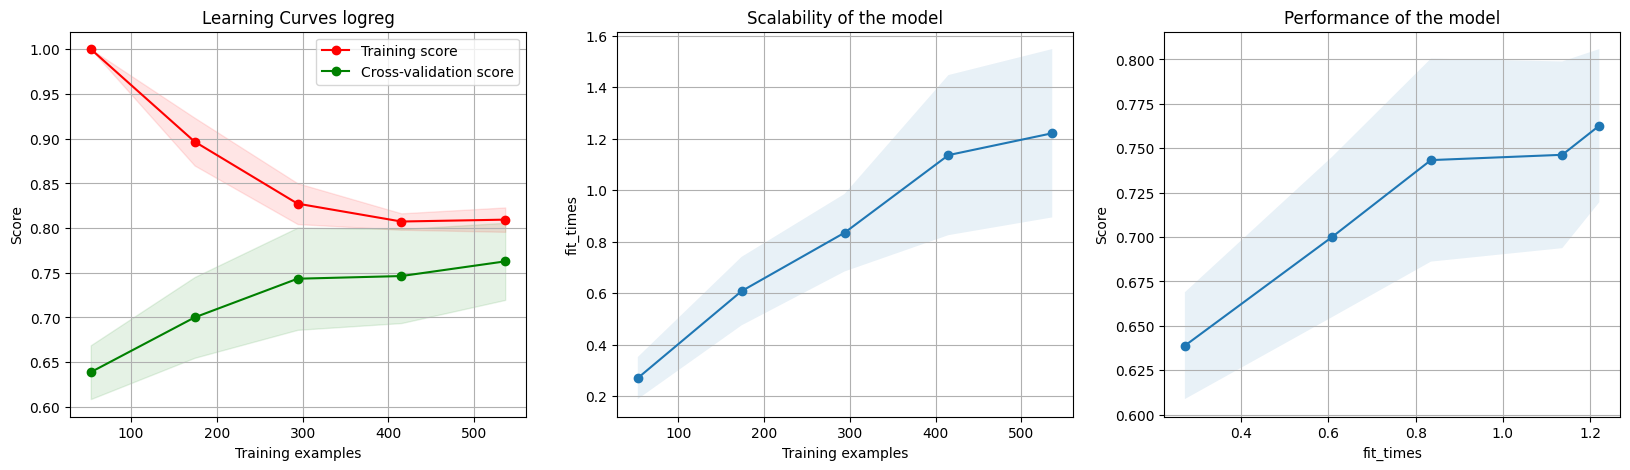

In [ ]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves logreg', X_train, y_train, n_jobs=-1)

In [ ]:
print(loaded_best_estimator_round1.score(X_train,y_train))

0.8029850746268656


In [ ]:
print(loaded_complete_grid_round1.best_score_)

0.7626865671641792


In [ ]:
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [ ]:
##Hyperparameter Tuning - Round 2

poly_transformer = ColumnTransformer( transformers=[('transformer', PolynomialFeatures(degree = 2),
                                                   ['age', 'duration', 'credit_amount'])]
                                                   ,remainder = 'passthrough')


In [ ]:
credit_risk_pipeline_2 = Pipeline([
('rare_label_encoder',
      RareLabelEncoder(variables=var_rare_labels,replace_with='Rare')),
('one_hot_encoder',
     OneHotEncoder(variables= categorical + discrete
                   ,drop_last= True, ignore_format=True)),
    ('log_transformer',
     LogTransformer(variables = continuous)),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(),variables=continuous)),


    ('poly_features', poly_transformer),

    ('logreg',
     LogisticRegression(random_state=123, max_iter =100000, n_jobs=-1
                       ,solver = 'saga'))
])

In [ ]:
set_config(display='diagram')
credit_risk_pipeline_2

Pipeline(steps=[('rare_label_encoder',
                 RareLabelEncoder(variables=['credit_history', 'purpose',
                                             'savings_status',
                                             'personal_status', 'other_parties',
                                             'other_payment_plans', 'job'])),
                ('one_hot_encoder',
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['checking_status', 'credit_history',
                                          'purpose', 'savings_status',
                                          'employment', 'personal_status',
                                          'oth...
                                           'age'])),
                ('scalar',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['duration',
                                                      'credit_amount',
                                                      'age'])),
                ('poly_features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transformer',
                                                  PolynomialFeatures(),
                                                  ['age', 'duration',
                                                   'credit_amount'])])),
                ('logreg',
                 LogisticRegression(max_iter=100000, n_jobs=-1,
                                    random_state=123, solver='saga'))])

In [ ]:
param_grid_2 = {

    'poly_features__transformer__degree':[2, 3],
    'logreg__C': [10000000000],
    'scalar__transformer': [StandardScaler(), MinMaxScaler()]}

In [ ]:
grid_logreg_2 = GridSearchCV(credit_risk_pipeline_2, param_grid_2,
                           cv=5, return_train_score= True, n_jobs=-1 )

In [ ]:
grid_logreg_2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable personal_status is less than that indicated in n_categories. Thus

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(variables=['credit_history',
                                                                    'purpose',
                                                                    'savings_status',
                                                                    'personal_status',
                                                                    'other_parties',
                                                                    'other_payment_plans',
                                                                    'job'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['checking_status',
                                                                 'credit_history',
                                                                 'purpose',
                                                                 'savings_status',
                                                                 'employ...
                                                          transformers=[('transformer',
                                                                         PolynomialFeatures(),
                                                                         ['age',
                                                                          'duration',
                                                                          'credit_amount'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           random_state=123,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [10000000000],
                         'poly_features__transformer__degree': [2, 3],
                         'scalar__transformer': [StandardScaler(),
                                                 MinMaxScaler()]},
             return_train_score=True)

In [ ]:
print(grid_logreg_2.best_params_)

{'logreg__C': 10000000000, 'poly_features__transformer__degree': 2, 'scalar__transformer': MinMaxScaler()}


In [ ]:
file_best_estimator_round2 = save_model_folder / 'logreg_round2_best_estimator.pkl'
file_complete_grid_round2 = save_model_folder / 'logreg_round2_complete_grid.pkl'

In [ ]:
joblib.dump(grid_logreg_2.best_estimator_, file_best_estimator_round2)
joblib.dump(grid_logreg_2, file_complete_grid_round2)

['/content/drive/MyDrive/data/models/ml_fall_2023/logreg_round2_complete_grid.pkl']

In [ ]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

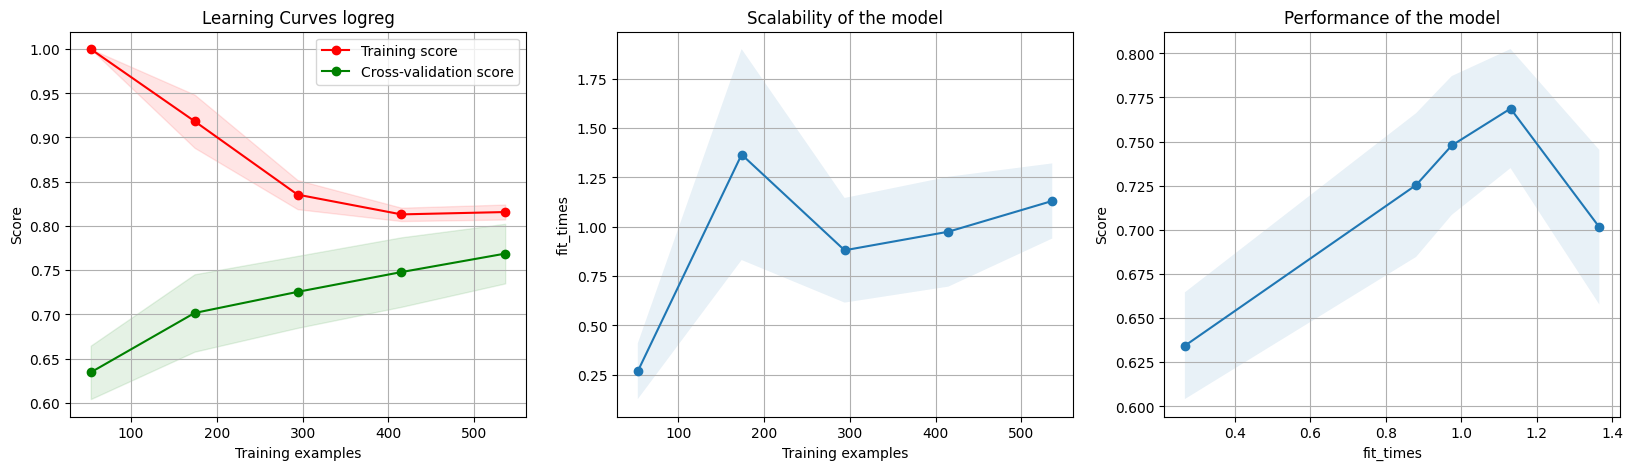

In [ ]:
plot_learning_curve(loaded_best_estimator_round2, 'Learning Curves logreg', X_train, y_train, n_jobs=-1)

In [ ]:
print(loaded_best_estimator_round2.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round2.best_score_)

0.817910447761194
0.7686567164179104


In [ ]:
#Hyperparameter Tuning - Round 3
#In this round, we will try polynomial of degree

param_grid_3 = {
    'poly_features__transformer__degree':[4],
    'logreg__C': [10000000000],
  }

In [ ]:
grid_logreg_3 = GridSearchCV(credit_risk_pipeline_2, param_grid_3,
                           cv=5, return_train_score= True, n_jobs=-1)

In [ ]:
grid_logreg_3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable personal_status is less than that indicated in n_categories. Thus

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(variables=['credit_history',
                                                                    'purpose',
                                                                    'savings_status',
                                                                    'personal_status',
                                                                    'other_parties',
                                                                    'other_payment_plans',
                                                                    'job'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['checking_status',
                                                                 'credit_history',
                                                                 'purpose',
                                                                 'savings_status',
                                                                 'employ...
                                       ('poly_features',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('transformer',
                                                                         PolynomialFeatures(),
                                                                         ['age',
                                                                          'duration',
                                                                          'credit_amount'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           random_state=123,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [10000000000],
                         'poly_features__transformer__degree': [4]},
             return_train_score=True)

In [ ]:
file_best_estimator_round3 = save_model_folder / 'logreg_round3_best_estimator.pkl'
file_complete_grid_round3 = save_model_folder / 'logreg_round3_complete_grid.pkl'

In [ ]:
joblib.dump(grid_logreg_3.best_estimator_, file_best_estimator_round3)
joblib.dump(grid_logreg_3, file_complete_grid_round3)

['/content/drive/MyDrive/data/models/ml_fall_2023/logreg_round3_complete_grid.pkl']

In [ ]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

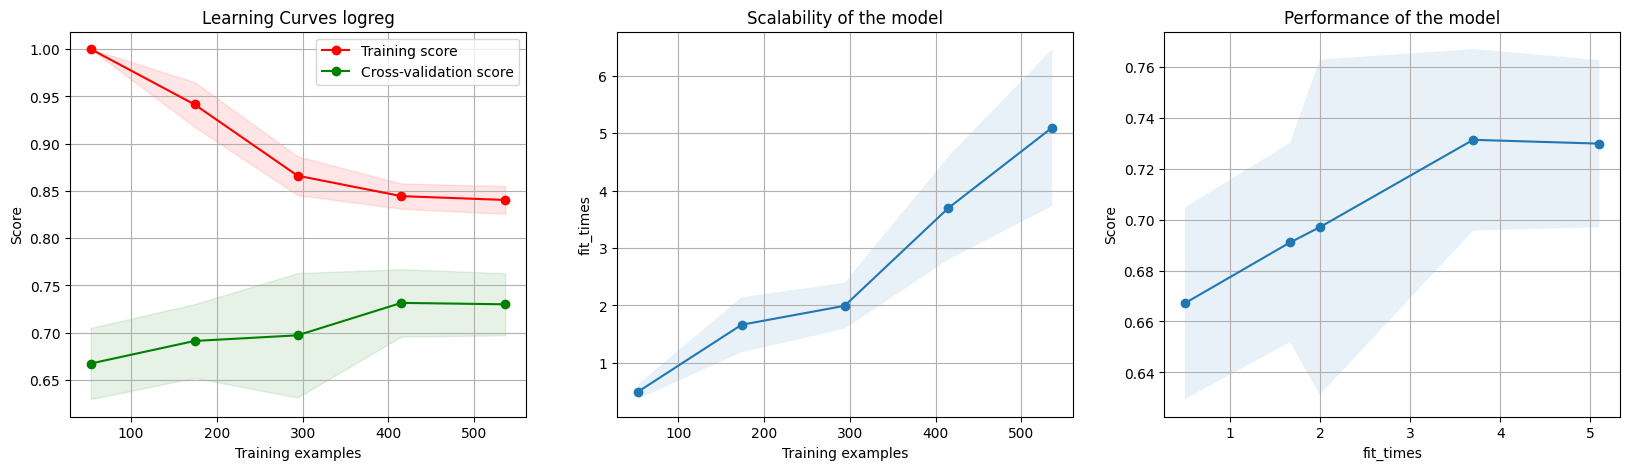

In [ ]:
plot_learning_curve(loaded_best_estimator_round3  , 'Learning Curves logreg', X_train, y_train, n_jobs=-1)

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round3.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round3.best_score_)

0.8328358208955224
0.7298507462686566


In [ ]:
print(loaded_complete_grid_round1 .best_score_)
print(loaded_complete_grid_round2 .best_score_)
print(loaded_complete_grid_round3 .best_score_)

0.7626865671641792
0.7686567164179104
0.7298507462686566


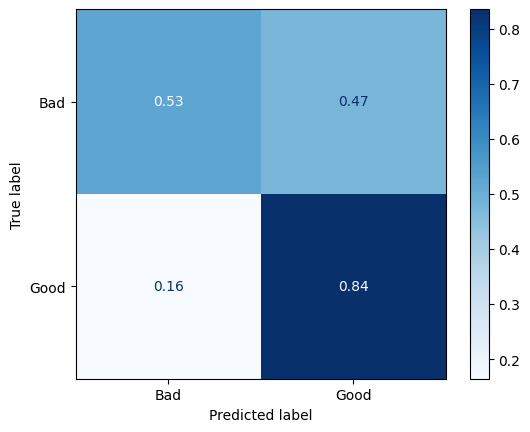

In [ ]:
# use the best estimator selected in previous step to plot the confusion matrix
# CODE HERE
ConfusionMatrixDisplay.from_estimator(loaded_best_estimator_round2, X_test, y_test,
                                 display_labels=['Bad', 'Good'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()

<font style color="Red"><font size=8>**CONCLUSION**

From the KNN Classification, the accuracy was 72.12%
Here, in logistic regression, the best accuracy is 76.87%
Also, the KNN classification model was biased towards the 'Good' target variable.
Here, in logistic regression, it is much better.
I recommend Logistic Regression.

#Linear Regression on Bike Sharing Dataset.

- Download the data from following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand'




-  Comparison with KNN from last project too.


**EDA from previous project for Bike Sharing Dataset**


1. We do not have missing values, no need for data imputation.
2. Number of unique values indicate no issues in data collection.
3. Dew point temperature and Temperature are highly correlated. We will drop Dew point temperature.
4. Wind speed is skewed, we will perform log tranformation on it.
5. Visibility, Solar Radiation, Rainfall, Snowfall, Humidity have non-standard distributions. We will do K-means discretization.
6. Functioning Day 'No' is a rare category. We will do rare label encoding for it.
7. We will also perform one hot encoding for discrete and categorical variables.
8. We will only use month value from the date, so we will drop date column.
9. The scales for temperature, humidity, windspeed,visibility,snowfall,rainfall,solar radiation are very different. We will perform Standard Scaling for them.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection import DropFeatures
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine import transformation as vt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression

from math import sqrt

In [ ]:
data='/content/drive/MyDrive/AML/data/SeoulBikeData.csv'

In [ ]:
df=pd.read_csv(data,encoding='unicode_escape')

In [ ]:
df.Date = pd.to_datetime(df.Date)
df['Date'][0:20]

<ipython-input-78-b1c32be02b3f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Date = pd.to_datetime(df.Date)


0    2017-01-12
1    2017-01-12
2    2017-01-12
3    2017-01-12
4    2017-01-12
5    2017-01-12
6    2017-01-12
7    2017-01-12
8    2017-01-12
9    2017-01-12
10   2017-01-12
11   2017-01-12
12   2017-01-12
13   2017-01-12
14   2017-01-12
15   2017-01-12
16   2017-01-12
17   2017-01-12
18   2017-01-12
19   2017-01-12
Name: Date, dtype: datetime64[ns]

In [ ]:
#instead of using the entire date, we will use just the month for our prediction. Extracting month from date :
df['month'] = df['Date'].dt.month
df['month']=df['month'].astype('object')

In [ ]:
# Create a list of categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']

# Create a list of discrete variables
discrete = [
    var for var in df.columns if df[var].dtype != 'O'
    and len(df[var].unique()) < 25 and var not in ['Rented Bike Count'] #for this dataset, we can treat hour as discrete
]

# Create a list of continuous Variables
continuous = [
    var for var in df.columns if df[var].dtype != 'O'
    if var not in discrete and var not in ['Rented Bike Count']
]

In [ ]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Rented Bike Count'], axis =1)
y = df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:

columns_to_drop = ['Date', 'Dew point temperature(°C)']
preprocessing_steps = Pipeline([
  ('drop_features',
      DropFeatures(columns_to_drop)),
  ('YJ_transformer',
   YeoJohnsonTransformer(variables = ['Wind speed (m/s)','Temperature(°C)'])),
  ('discretizer_',
      SklearnTransformerWrapper(KBinsDiscretizer(encode= 'ordinal', strategy = 'kmeans', subsample=None),
                               variables = ['Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Humidity(%)'])),
  ('rare_label_encoder',
      RareLabelEncoder(variables='Functioning Day',replace_with='Rare')),
  ('one_hot_encoder',
     OneHotEncoder(variables=categorical+discrete
                   ,drop_last= True, ignore_format=True)),
  ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'])),


])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class ConvertToNumpyArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)

In [ ]:
bike_pipeline = Pipeline([
    ('preprocessor', preprocessing_steps),  # preprocessing steps
    ('convert_to_numpy', ConvertToNumpyArray()),  # ustom numpy converter
    ('norm_reg', LinearRegression())
])

In [ ]:
bike_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('drop_features',
                                  DropFeatures(features_to_drop=['Date',
                                                                 'Dew point '
                                                                 'temperature(°C)'])),
                                 ('YJ_transformer',
                                  YeoJohnsonTransformer(variables=['Wind speed '
                                                                   '(m/s)',
                                                                   'Temperature(°C)'])),
                                 ('discretizer_',
                                  SklearnTransformerWrapper(transformer=KBinsDiscretizer(encode='ordinal',
                                                                                         strategy='kmeans',
                                                                                         subsample=None),
                                                            var...
                                                variables=['Seasons', 'Holiday',
                                                           'Functioning Day',
                                                           'month', 'Hour'])),
                                 ('scalar',
                                  SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                                            variables=['Temperature(°C)',
                                                                       'Humidity(%)',
                                                                       'Wind '
                                                                       'speed '
                                                                       '(m/s)',
                                                                       'Visibility '
                                                                       '(10m)',
                                                                       'Solar '
                                                                       'Radiation '
                                                                       '(MJ/m2)',
                                                                       'Rainfall(mm)',
                                                                       'Snowfall '
                                                                       '(cm)']))])),
                ('convert_to_numpy', ConvertToNumpyArray()),
                ('norm_reg', LinearRegression())])

In [ ]:
X_train_preds = bike_pipeline.predict(X_train)
X_test_preds = bike_pipeline.predict(X_test)

In [ ]:
print(f'train mse: {mean_squared_error(y_train, X_train_preds)}')
print(f'train rmse: {sqrt(mean_squared_error(y_train, X_train_preds))}')
print(f'train r2: {r2_score(y_train, X_train_preds)}')
print()
print(f'test mse: {mean_squared_error(y_test, X_test_preds)}')
print(f'test rmse: {sqrt(mean_squared_error(y_test, X_test_preds))}')
print(f'test r2: {r2_score(y_test, X_test_preds)}')

# print regression co-effeicient
print('regression co-efficients :',bike_pipeline.named_steps['norm_reg'].coef_)
print('\n intercept',bike_pipeline.named_steps['norm_reg'].intercept_)

scores = cross_val_score(bike_pipeline, X_train, y_train,cv=5)
print(scores)
print(scores.mean())

train mse: 139344.65314490398
train rmse: 373.28896734956413
train r2: 0.6682375242020482

test mse: 136168.2604760121
test rmse: 369.0098379122325
test r2: 0.6659491437712012
regression co-efficients : [ 1385.041881    -295.98443744    42.81326206   108.25697348
   339.72833351 -1136.9441178     67.7882849   -142.74385162
  -279.77951672  -182.23865267   148.54140434   907.31742651
   141.09580309     2.08584231   -85.87640325   -67.96386544
  -124.31806671  -150.67830553  -161.55068167  -101.48402049
   -25.51599927   -64.37687586   -73.80007455  -154.30473782
  -269.79547043   329.82241477  -170.40117224   444.20256809
  -320.14817876   270.14624601  -255.88651292  -200.71836219
  -289.26887256   109.9048752   -334.49398525   515.07431799
   417.69811317  -259.15971419   128.56343715    10.86927702
   436.62676291    12.12982264   760.53297751  -251.99689188
   -87.52107101  -260.42087812]

 intercept -881.6531651618311


/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_catego

[0.67677909 0.64641632 0.66897108 0.65805008 0.66371503]
0.6627863206715556


/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [ ]:
#LOADING THE BEST MODEL STORED FROM HW 4 TO GET ITS ACCURACY FOR COMPARISON
file_best_est_knn_reg = save_model_folder / 'knn_reg_best_estimator.pkl'
file_complete_grid_knn_reg = save_model_folder / 'knn_reg_complete_grid.pkl'
loaded_best_estimator_knn_reg = joblib.load(file_best_est_knn_reg)
loaded_complete_grid_knn_reg = joblib.load(file_complete_grid_knn_reg)

In [ ]:
#let's check the train scores
print(loaded_best_estimator_knn_reg.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_knn_reg.best_score_)

0.7972561922907084
0.7386306184104467


<font style color="Red"><font size=8>**CONCLUSION**

The test R squared from linear regression is 0.67
The test accuracy of KNN Regressor is 0.74
While the higher accuracy value of the KNN Regressor is appealing, we have to be careful while comparing it with R squared of the linear regressor. With the linear regressor, we have a good R squared value, which tells us that a good amount of variation in the independent variable (Rented Bike Count) is being explained from the independent variables. Also, the linear regressor gives us beta coefficients which helps us understand the effect of each independent variable on Rented Bike Count. Thus, for actual application, I believe that the linear regressor provides better and reliable information. I recommend the linear regressor for predicting Rented Bike Count.